In [5]:
import pandas as pd
import os
from omegaconf import OmegaConf
import torch
from models.actor import InterpretableNormalActor, \
    InterpretableDirichletActor, InterpretableBetaActor, \
    InterpretableDeltaActor
from utils import log_results
import seaborn as sns
actor_types = {
    'normal': InterpretableNormalActor,
    'dirichlet': InterpretableDirichletActor,
    'beta': InterpretableBetaActor,
    'delta': InterpretableDeltaActor,
}
# actor_params = args.actor.value['{}_params'.format(
#     args.actor.value.type)]
# actor_params.update(args.actor.value['shared_params'])
# actor = actor_types[args.actor.value.type](actor_params)
def get_train_eval_df(outdir):
    args = OmegaConf.load(os.path.join(outdir, 'config.yaml'))
    val_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('val_metrics')}
    train_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('train_metrics')}
    ckpt_files = {int(x.split('epoch=')[1].split('_')[0]): x for x in os.listdir(outdir) if x.startswith('ckpt')}
    rows = []
    for k in ckpt_files.keys():
        if k not in val_files.keys() or k not in train_files.keys():
            continue
        rows.append({'epoch': k, 'ckpt_file': ckpt_files[k]})
        # state_dict = torch.load(os.path.join(outdir, ckpt_files[k]), map_location='cpu')['actor']
        # actor.load_state_dict(state_dict)
        actor = None
        val_results = pd.read_csv(os.path.join(outdir, val_files[k]))
        rows[-1].update(log_results(args.env.value.reward_type, val_results, 'val', actor=actor))
        train_results = pd.read_csv(os.path.join(outdir, train_files[k]))
        rows[-1].update(log_results(args.env.value.reward_type, train_results, 'train', actor=actor))
    df = pd.DataFrame(rows)
    best_row = df.sort_values('val_auroc_macro')[['epoch', 'val_auroc_macro', 'ckpt_file']].iloc[-1]
    print('best model path:', os.path.join(outdir, best_row.ckpt_file))
    print(best_row)
    return df, best_row

/work/frink/mcinerney.de/envs/ehragent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# all sentences

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/ckpt_epoch=145_updates=1160.pt
epoch                                         145
val_auroc_macro                          0.816176
ckpt_file          ckpt_epoch=145_updates=1160.pt
Name: 10, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

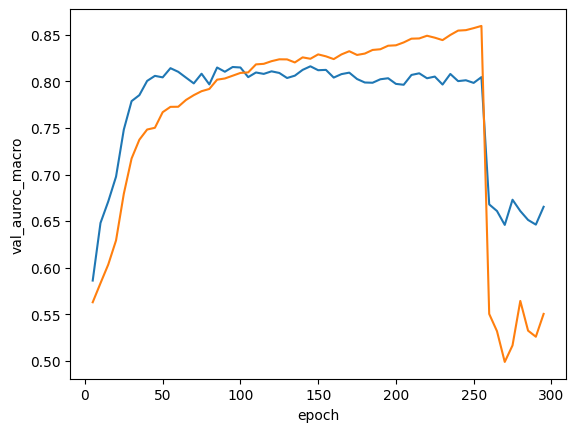

In [2]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

# llm evidence

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/ckpt_epoch=95_updates=679.pt
epoch                                        95
val_auroc_macro                          0.7903
ckpt_file          ckpt_epoch=95_updates=679.pt
Name: 133, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

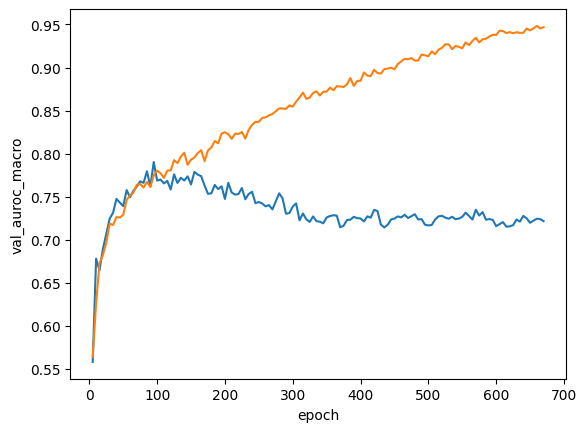

In [7]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

# llm evidence bert predictor

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/ckpt_epoch=150_updates=1200.pt
epoch                                         150
val_auroc_macro                          0.784637
ckpt_file          ckpt_epoch=150_updates=1200.pt
Name: 51, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

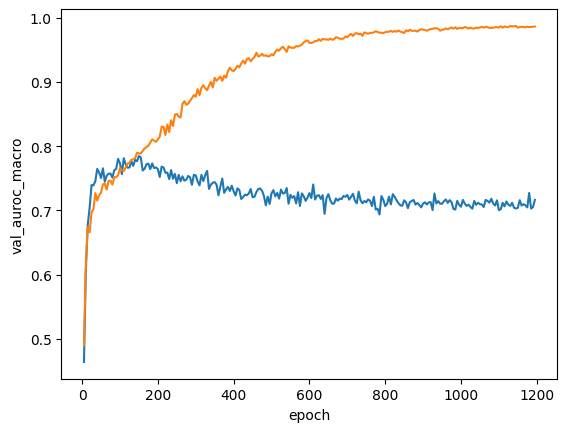

In [8]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

# longformer predictor

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/ckpt_epoch=85_updates=680.pt
epoch                                        85
val_auroc_macro                        0.828801
ckpt_file          ckpt_epoch=85_updates=680.pt
Name: 30, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

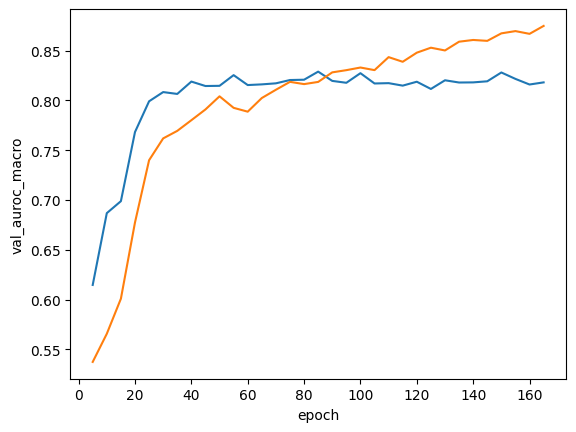

In [139]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

# bert predictor

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/ckpt_epoch=65_updates=520.pt
epoch                                        65
val_auroc_macro                        0.797324
ckpt_file          ckpt_epoch=65_updates=520.pt
Name: 36, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

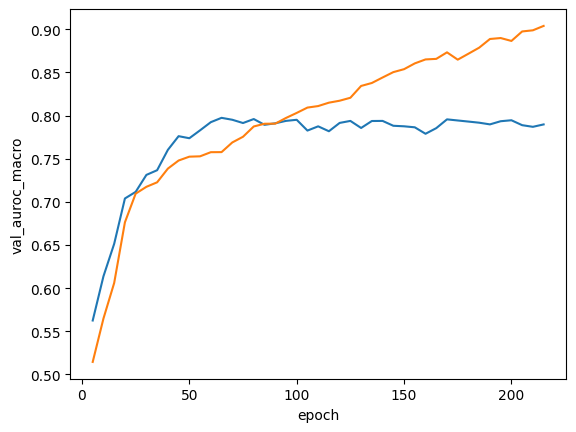

In [140]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

# female

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231208_163544-02l9kjyl/files/ckpt_epoch=55_updates=398.pt
epoch                                        55
val_auroc_macro                        0.778598
ckpt_file          ckpt_epoch=55_updates=398.pt
Name: 101, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

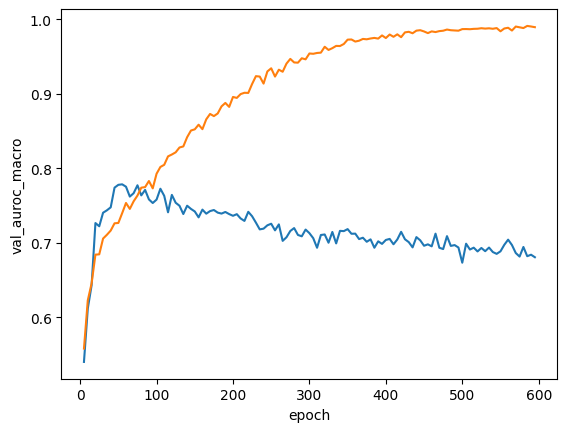

In [2]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231208_163544-02l9kjyl/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')

# male

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231209_055130-nkktnp77/files/ckpt_epoch=105_updates=755.pt
epoch                                        105
val_auroc_macro                         0.768529
ckpt_file          ckpt_epoch=105_updates=755.pt
Name: 1, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

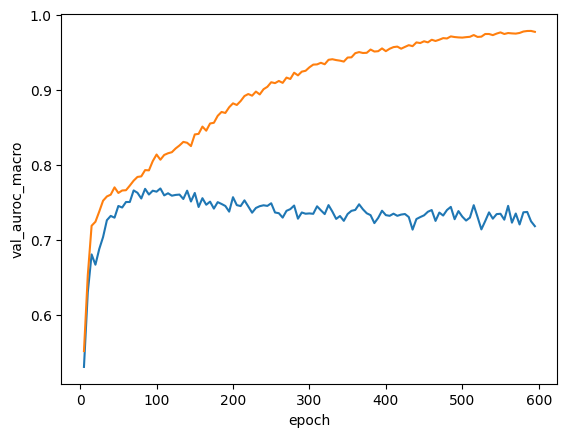

In [3]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231209_055130-nkktnp77/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')


# white

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231210_021615-8ofb1nfp/files/ckpt_epoch=130_updates=934.pt
epoch                                        130
val_auroc_macro                         0.781479
ckpt_file          ckpt_epoch=130_updates=934.pt
Name: 7, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

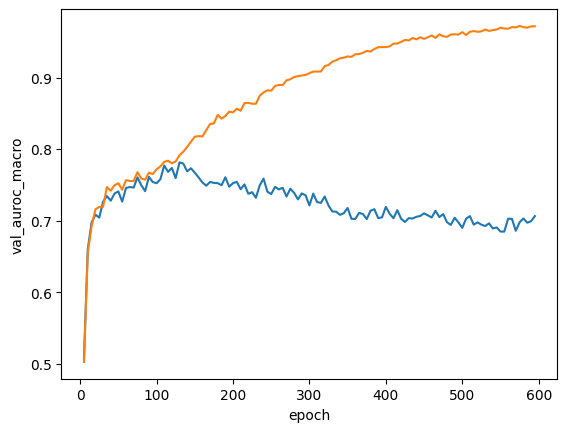

In [4]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231210_021615-8ofb1nfp/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')


# black

best model path: /scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231210_021631-n03ypa6b/files/ckpt_epoch=460_updates=3276.pt
epoch                                         460
val_auroc_macro                          0.868687
ckpt_file          ckpt_epoch=460_updates=3276.pt
Name: 80, dtype: object


<Axes: xlabel='epoch', ylabel='val_auroc_macro'>

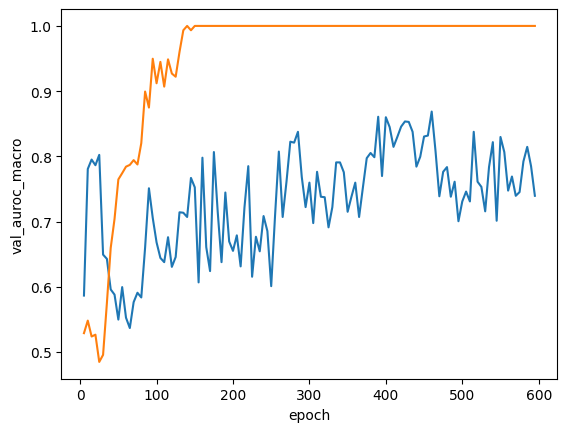

In [5]:
df, best_row = get_train_eval_df('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231210_021631-n03ypa6b/files')
sns.lineplot(data=df, x='epoch', y='val_auroc_macro')
sns.lineplot(data=df, x='epoch', y='train_auroc_macro')


In [2]:
import pandas as pd
import numpy as np
def get_top_differences(df1, name1, df2, name2):
    vote_columns = [c for c in df1.columns if c.endswith(' vote')]
    df1 = df1.rename(columns={c: c + ' ' + name1 for c in vote_columns})
    df2 = df2.rename(columns={c: c + ' ' + name2 for c in vote_columns})
    df = df1.merge(df2, on=["episode_idx", "time_step", "evidence"])
    df['score'] = df.apply(
        lambda r: ((np.array([r[c + ' ' + name1] for c in vote_columns])
                    - np.array([r[c + ' ' + name2] for c in vote_columns])) ** 2).mean(),
        axis=1)
    df = df.sort_values('score', ascending=False)
    conditions = ['cancer', 'pneumonia', 'pulmonary edema'] # from config
    for i, row in df[:10].iterrows():
        print(row.evidence)
        print(
            f'{name1} model prediction:',
            conditions[np.array([row[c + ' ' + name1]
                                 for c in vote_columns]).argmax()])
        print(
            f'{name2} model prediction:',
            conditions[np.array([row[c + ' ' + name2]
                                 for c in vote_columns]).argmax()])
    return df
evidence_df_female = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231208_163544-02l9kjyl/files/full_test_metrics_ckpt_epoch=55_updates=398_seed=0_evidence.csv')
evidence_df_male = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231209_055130-nkktnp77/files/full_test_metrics_ckpt_epoch=105_updates=755_seed=0_evidence.csv')
evidence_df_white = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231210_021615-8ofb1nfp/files/full_test_metrics_ckpt_epoch=130_updates=934_seed=0_evidence.csv')
evidence_df_black = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231210_021631-n03ypa6b/files/full_test_metrics_ckpt_epoch=460_updates=3276_seed=0_evidence.csv')

In [3]:
x = get_top_differences(evidence_df_male, 'male', evidence_df_female, 'female')

cancer (diagnosis): The patient has a known B cell lymphoma.
Signs: Small right-sided lung nodules are present, best seen on recent CT. The pulmonary vasculature is normal. The osseous structures demonstrate a well- defined sclerotic lesion in the right (day -36)
male model prediction: pneumonia
female model prediction: cancer
cancer (diagnosis): The patient has lymphoma.
Signs: Anterior to the left clavicular head, there is a 9-mm lymph node (4:18) which likely corresponds to an FDG-avid focus. In the right internal mammary chain, there is (day -24)
male model prediction: pneumonia
female model prediction: cancer
cancer (diagnosis): ct of torso shows mediastinal lymphadenapathy, poss lymphoma
Signs: ct of torso shows mediastinal lymphadenapathy, poss lymphoma (day -1)
male model prediction: pneumonia
female model prediction: cancer
cancer (diagnosis): The patient has leukemia.
Signs: Bibasilar atelectases, left greater than right, are unchanged. There is no evident pneumothorax or ple

In [4]:
x = get_top_differences(evidence_df_white, 'white', evidence_df_black, 'black')

pneumonia (diagnosis): The patient has a R and L chesttube - R placed in OR. Pt had Bronchoscopy in OR and plugs removed. Plan to remain on current settings at this time. Plan to go to Angio for R (day -3)
white model prediction: pneumonia
black model prediction: pulmonary edema
cancer (diagnosis): Signs: Mediastinal contours are stable radiographically compared to initial postoperative radiographs. Left pneumonectomy space is partially filled with fluid, not substantially changed since the recent study of earlier the same date. Subcutaneous em (day -1)
white model prediction: cancer
black model prediction: pulmonary edema
pneumonia (diagnosis): The patient has a pleural effusion.
Signs: There is blunting of the left costophrenic angle with left pleural effusion seen best on the lateral film. There is obscuration of the left hemidiaphragm consistent with a left lower lob (day -23)
white model prediction: pneumonia
black model prediction: pulmonary edema
pneumonia (diagnosis): Atelectas

In [6]:
def f1(p, r):
    return 2*p*r/(p + r)
def plot_model_performance(model_outputs):
    rows = []
    for model_name, output_paths in model_outputs.items():
        print(model_name)
        for output_path in output_paths:
            args = OmegaConf.load(os.path.join(
                '/'.join(output_path.split('/')[:-1]), 'config.yaml'))
            rows.append({
                'model': model_name, 'file': output_path,
                'seed': int(output_path.split('_seed=')[1].split('_')[0]),
                'Interpretable': 'Interpretable' if not model_name.endswith('predictor') else 'Not Interpretable',
            })
            if os.path.exists(output_path):
                # state_dict = torch.load(os.path.join(outdir, ckpt_files[k]), map_location='cpu')['actor']
                # actor.load_state_dict(state_dict)
                actor = None
                print(output_path)
                df = pd.read_csv(output_path)
                rows[-1].update(log_results(
                    args.env.value.reward_type, df, 'test', actor=actor))
                rows[-1]['test_f1_macro'] = f1(
                    rows[-1]['test_precision_macro'],
                    rows[-1]['test_recall_macro'])
                suffixes = set([
                    '_' + c.split('_')[-1]
                    for c in df.columns if c.endswith('-evidence')])
                for suffix in suffixes:
                    # if df['action_target_score_deterministic' + suffix].isna().sum() > 0:
                    #     # print(df[df['action_target_score_deterministic' + suffix].isna()])
                    #     continue
                    rows.append(dict(rows[-1]))
                    rows[-1]['suffix'] = suffix
                    rows[-1]['Maximum Evidence Used'] = int(
                        suffix.split('-')[1])
                    rows[-1].update(log_results(
                        args.env.value.reward_type, df, 'test', actor=actor,
                        suffix=suffix))
                    rows[-1]['test_f1_macro'] = f1(
                        rows[-1]['test_precision_macro'],
                        rows[-1]['test_recall_macro'])
    return pd.DataFrame(rows)


In [7]:
results = plot_model_performance(dict(
    all_sentences=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=4_steps.csv",
    ],
    llm_evidence=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=4_steps.csv",
    ],
    llm_evidence_bert_predictor=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231129_201913-pmgcy2p1/files/full_test_metrics_ckpt_epoch=150_updates=1200_seed=4_steps.csv",
    ],
    longformer_predictor=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231202_180041-4hxu38wc/files/full_test_metrics_ckpt_epoch=85_updates=680_seed=4_steps.csv",
    ],
    bert_predictor=[
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=0_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=1_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=2_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=3_steps.csv",
        "/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20231203_090527-flsmcmkx/files/full_test_metrics_ckpt_epoch=65_updates=520_seed=4_steps.csv",
    ]
))
model_names = {
    'all_sentences': 'Interpretable',
    'llm_evidence': 'Interpretable',
    'llm_evidence_bert_predictor': 'BERT',
    'bert_predictor': 'BERT',
    'longformer_predictor': 'Longformer',
}
rename_columns = {
    'test_auroc_macro': 'AUROC',
    'test_precision_macro': 'Precision',
    'test_recall_macro': 'Recall',
    'test_f1_macro': 'F1',
}
model_order1 = [
    'BERT',
    'Longformer',
    'Interpretable',
]
model_order2 = [
    'BERT',
    'Interpretable',
]
results['Model'] = results['model'].apply(lambda x: model_names[x])
results = results.rename(columns=rename_columns)
results1 = results[~results['model'].str.startswith('llm_evidence')]
results2 = results[results['model'].str.startswith('llm_evidence')]
results1 = pd.concat([
    results1[results1['Model'] == m]
    for m in model_order1
])
results2 = pd.concat([
    results2[results2['Model'] == m]
    for m in model_order2
])
results


all_sentences
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_steps.csv
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=1_steps.csv
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=2_steps.csv
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=3_steps.csv
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=4_steps.csv
llm_evidence
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=0_steps.csv
/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/ru

,model,file,seed,Interpretable,test_bce_loss_micro,test_auroc_micro,pneumonia/test_bce_loss,pneumonia/test_auroc,pulmonary edema/test_bce_loss,pulmonary edema/test_auroc,...,pulmonary edema/test_recall,pulmonary edema/test_recall_det,cancer/test_precision,cancer/test_precision_det,cancer/test_recall,cancer/test_recall_det,F1,suffix,Maximum Evidence Used,Model
0,all_sentences,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Interpretable,0.299977,0.812801,0.329232,0.754111,0.405929,0.751535,...,0.097235,0.097235,0.679181,0.679181,0.434498,0.434498,0.308971,NaN,NaN,Interpretable
1,all_sentences,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Interpretable,1.612404,0.713012,0.789193,0.656503,1.174232,0.643666,...,0.458519,0.458519,0.207970,0.207970,0.729258,0.729258,0.317011,_top-5-evidence,5.0,Interpretable
2,all_sentences,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Interpretable,0.765636,0.769466,0.559845,0.712912,0.797793,0.680262,...,0.398751,0.398751,0.353222,0.353222,0.646288,0.646288,0.369048,_top-20-evidence,20.0,Interpretable
3,all_sentences,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Interpretable,0.396651,0.799810,0.418451,0.742165,0.497498,0.726255,...,0.226583,0.226583,0.516199,0.516199,0.521834,0.521834,0.359626,_top-80-evidence,80.0,Interpretable
4,all_sentences,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,0,Interpretable,1.121652,0.742536,0.660831,0.681403,0.996213,0.660031,...,0.462979,0.462979,0.269492,0.269492,0.694323,0.694323,0.347154,_top-10-evidence,10.0,Interpretable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,4,Not Interpretable,0.315336,0.773090,0.345576,0.697036,0.425872,0.697475,...,0.033006,0.033006,0.695341,0.695341,0.423581,0.423581,0.264961,_top-5-evidence,5.0,BERT
141,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,4,Not Interpretable,0.315336,0.773090,0.345576,0.697036,0.425872,0.697475,...,0.033006,0.033006,0.695341,0.695341,0.423581,0.423581,0.264961,_top-20-evidence,20.0,BERT
142,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,4,Not Interpretable,0.315336,0.773090,0.345576,0.697036,0.425872,0.697475,...,0.033006,0.033006,0.695341,0.695341,0.423581,0.423581,0.264961,_top-80-evidence,80.0,BERT
143,bert_predictor,/scratch/mcinerney.de/ehr-diagnosis-agent-outp...,4,Not Interpretable,0.315336,0.773090,0.345576,0.697036,0.425872,0.697475,...,0.033006,0.033006,0.695341,0.695341,0.423581,0.423581,0.264961,_top-10-evidence,10.0,BERT


In [8]:
results[['Model', 'AUROC', 'Precision', 'Recall', 'F1', 'Maximum Evidence Used', 'seed']]

,Model,AUROC,Precision,Recall,F1,Maximum Evidence Used,seed
0,Interpretable,0.798959,0.558307,0.213585,0.308971,NaN,0
1,Interpretable,0.717833,0.229906,0.510378,0.317011,5.0,0
2,Interpretable,0.757540,0.301274,0.476166,0.369048,20.0,0
3,Interpretable,0.786376,0.385259,0.337192,0.359626,80.0,0
4,Interpretable,0.736155,0.262847,0.511081,0.347154,10.0,0
...,...,...,...,...,...,...,...
140,BERT,0.755386,0.669805,0.165145,0.264961,5.0,4
141,BERT,0.755386,0.669805,0.165145,0.264961,20.0,4
142,BERT,0.755386,0.669805,0.165145,0.264961,80.0,4
143,BERT,0.755386,0.669805,0.165145,0.264961,10.0,4


/tmp/ipykernel_208759/3725865827.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(


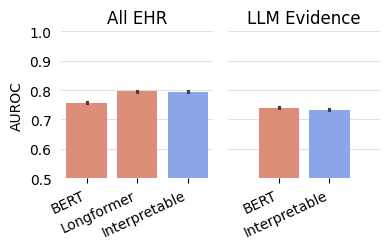

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(4, 2.6), sharey=True)
chart1 = sns.barplot(
    data=results1[results1.suffix.isna()],
    x='Model', y='AUROC', hue='Interpretable', legend=False, dodge=False, ax=axs[0],
    palette=[sns.color_palette("coolwarm", 4)[3], sns.color_palette("coolwarm", 4)[0]])
chart2 = sns.barplot(
    data=results2[results2.suffix.isna()],
    x='Model', y='AUROC', hue='Interpretable', legend=False, dodge=False, ax=axs[1],
    palette=[sns.color_palette("coolwarm", 4)[3], sns.color_palette("coolwarm", 4)[0]])
for chart in [chart1, chart2]:
    chart.grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
    chart.yaxis.set_tick_params(width=0)
    chart.set_axisbelow(True)
    chart.spines['right'].set_visible(False)
    chart.spines['top'].set_visible(False)
    chart.spines['left'].set_visible(False)
    chart.spines['bottom'].set_visible(False)

    chart.set_xticklabels(
        chart.get_xticklabels(),
        horizontalalignment='right',
        # weight='bold',
        rotation=25,
    )
    chart.set_xlabel('')
chart1.set(xlim=[-.5, 2.5], ylim=[0.5, 1])
chart2.set(xlim=[-1, 2], ylim=[0.5, 1])
# chart1.legend(
#     title="",
#     loc="upper right",
#     frameon=False,
# )
chart2.set_ylabel('')
# fig.legend(
#     title="",
#     loc="upper right",
#     frameon=False,
# )
chart1.set_title('All EHR')
chart2.set_title('LLM Evidence')
fig.tight_layout()
fig.savefig('rp_performance.pdf')

/tmp/ipykernel_208759/2580257225.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(


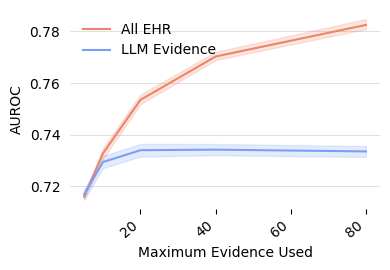

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
model_names = {
    'all_sentences': 'All EHR',
    'llm_evidence': 'LLM Evidence',
}
results['Model'] = results['model'].apply(lambda x: model_names[x] if x in model_names.keys() else x)
fig, axs = plt.subplots(1, 1, figsize=(4, 2.8))
chart = sns.lineplot(data=results[(~results.suffix.isna()) & (results.Interpretable == 'Interpretable')],
    x='Maximum Evidence Used', y='AUROC', hue='Model', ax=axs,
    palette=[sns.color_palette("coolwarm", 4)[3], sns.color_palette("coolwarm", 4)[0]])
chart.grid(True, axis='y', linestyle='-', linewidth=0.5, color='lightgray')
chart.yaxis.set_tick_params(width=0)
chart.set_axisbelow(True)
# chart.axis([-.5, 4.5, 0.5, 1])
chart.spines['right'].set_visible(False)
chart.spines['top'].set_visible(False)
chart.spines['left'].set_visible(False)
chart.spines['bottom'].set_visible(False)
chart.legend(
    title="",
    loc="upper left",
    frameon=False,
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    # weight='bold',
    rotation=40,
)
# chart.set_xlabel('')
fig.tight_layout()
fig.savefig('rp_performance_evidence_ablation.pdf')

In [23]:
import numpy as np
model_names = {
    'all_sentences': 'Interpretable (All EHR)',
    'llm_evidence': 'Interpretable (LLM Evidence)',
    'llm_evidence_bert_predictor': 'BERT (LLM Evidence)',
    'bert_predictor': 'BERT (All EHR)',
    'longformer_predictor': 'Longformer (All EHR)',
}
results['Model'] = results['model'].apply(lambda x: model_names[x] if x in model_names.keys() else x)
results_agg = results[results.suffix.isna()].copy()
for metric in ['AUROC', 'Precision', 'Recall', 'F1']:
    results_agg[f'{metric} stddev'] = results_agg[metric]
results_agg = results_agg.groupby('Model').agg(dict(
    **{m: np.mean for m in ['AUROC', 'Precision', 'Recall', 'F1']},
    **{f'{m} stddev': np.std for m in ['AUROC', 'Precision', 'Recall', 'F1']},
))
results_agg

,AUROC,Precision,Recall,F1,AUROC stddev,Precision stddev,Recall stddev,F1 stddev
Model,,,,,,,,
BERT (All EHR),0.756214,0.655634,0.168304,0.267799,0.001927,0.013783,0.003830,0.004345
BERT (LLM Evidence),0.739964,0.515893,0.227068,0.315311,0.002659,0.013243,0.002672,0.004244
Interpretable (All EHR),0.795196,0.564957,0.205432,0.301253,0.002324,0.005660,0.005806,0.006033
Interpretable (LLM Evidence),0.733355,0.535530,0.149621,0.233873,0.002722,0.010938,0.003583,0.004824
Longformer (All EHR),0.796427,0.554655,0.287966,0.379089,0.002223,0.003182,0.004335,0.003819


In [24]:
latex_table = ""
for metric in ['AUROC', 'Precision', 'Recall', 'F1']:
    latex_table += f"& {metric} "
latex_table += "\\\\\n\hline\n"
use_stddev = True
model_order = [
    'BERT (All EHR)',
    'Longformer (All EHR)',
    'Interpretable (All EHR)',
    'BERT (LLM Evidence)',
    'Interpretable (LLM Evidence)',
]
for model in model_order:
    row = results_agg.loc[model]
    latex_table += f'{model} '
    for metric in ['AUROC', 'Precision', 'Recall', 'F1']:
        latex_table += '& {:.1f} '.format(row[metric] * 100)
        stddev = row[f'{metric} stddev'] * 100
        latex_table += ' $\pm$ '
        if stddev >= 1:
            latex_table += '{:.2f} '.format(stddev)
        else:
            latex_table += '{:.2f} '.format(stddev)[1:]
    latex_table += '\\\\\n'
print(latex_table)

& AUROC & Precision & Recall & F1 \\
\hline
BERT (All EHR) & 75.6  $\pm$ .19 & 65.6  $\pm$ 1.38 & 16.8  $\pm$ .38 & 26.8  $\pm$ .43 \\
Longformer (All EHR) & 79.6  $\pm$ .22 & 55.5  $\pm$ .32 & 28.8  $\pm$ .43 & 37.9  $\pm$ .38 \\
Interpretable (All EHR) & 79.5  $\pm$ .23 & 56.5  $\pm$ .57 & 20.5  $\pm$ .58 & 30.1  $\pm$ .60 \\
BERT (LLM Evidence) & 74.0  $\pm$ .27 & 51.6  $\pm$ 1.32 & 22.7  $\pm$ .27 & 31.5  $\pm$ .42 \\
Interpretable (LLM Evidence) & 73.3  $\pm$ .27 & 53.6  $\pm$ 1.09 & 15.0  $\pm$ .36 & 23.4  $\pm$ .48 \\



/tmp/ipykernel_208759/751519055.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_df_raw = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_evidence.csv')


LLM Evidence
All EHR


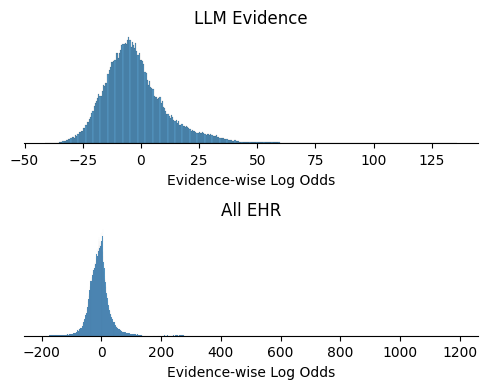

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
evidence_df_llm = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=0_evidence.csv')
evidence_df_raw = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_evidence.csv')
evidence_df = []
for df, name in [(evidence_df_llm, 'LLM Evidence'), (evidence_df_raw, 'All EHR')]:
    print(name)
    for c in df.columns:
        if c.endswith(' vote'):
            evidence_df_temp = df.copy()
            evidence_df_temp['Evidence-wise Log Odds'] = evidence_df_temp[c]
            evidence_df_temp['Condition'] = c.split(' (')[0]
            evidence_df_temp['Model'] = name
            evidence_df.append(evidence_df_temp)
evidence_df = pd.concat(evidence_df).reset_index()
# sns.histplot(evidence_df, x='Vote', hue='Model', stat='percent')
# plt.show()
fig, axs = plt.subplots(2, 1, figsize=(5, 4))
sns.histplot(evidence_df[evidence_df.Model == 'LLM Evidence'], x='Evidence-wise Log Odds', ax=axs[0])
axs[0].set_title('LLM Evidence')
axs[0].get_yaxis().set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['top'].set_visible(False)
# plt.show()
sns.histplot(evidence_df[evidence_df.Model == 'All EHR'].reset_index(), x='Evidence-wise Log Odds', ax=axs[1])
axs[1].set_title('All EHR')
axs[1].get_yaxis().set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)
fig.tight_layout()
# plt.show()
fig.savefig('evidence_log_odds_hist.pdf')

/tmp/ipykernel_208759/985186261.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  evidence_df_raw = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_evidence.csv')


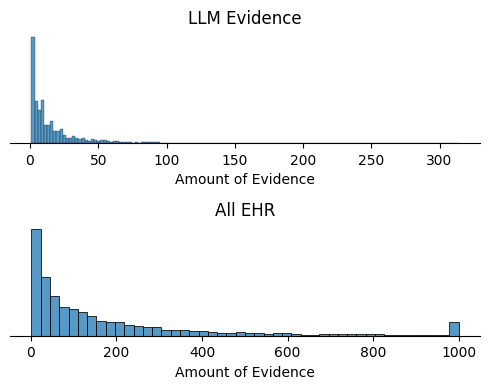

In [26]:
import numpy as np
evidence_df_llm = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230927_194029-jhtf7taf/files/full_test_metrics_ckpt_epoch=95_updates=679_seed=0_evidence.csv')
evidence_df_llm['Model'] = ['LLM Evidence'] * len(evidence_df_llm)
evidence_df_raw = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230925_104538-57jsyt8v/files/full_test_metrics_ckpt_epoch=145_updates=1160_seed=0_evidence.csv')
evidence_df_raw['Model'] = ['All EHR'] * len(evidence_df_raw)
evidence_df = pd.concat([evidence_df_llm, evidence_df_raw])
evidence_df['Amount of Evidence'] = 1
evidence_df = evidence_df.groupby(['Model', 'episode_idx']).agg({'Amount of Evidence': np.sum}).reset_index()
fig, axs = plt.subplots(2, 1, figsize=(5, 4))
sns.histplot(evidence_df[evidence_df.Model == 'LLM Evidence'], x='Amount of Evidence', ax=axs[0])
axs[0].set_title('LLM Evidence')
axs[0].get_yaxis().set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['top'].set_visible(False)
# plt.show()
sns.histplot(evidence_df[evidence_df.Model == 'All EHR'].reset_index(), x='Amount of Evidence', ax=axs[1])
axs[1].set_title('All EHR')
axs[1].get_yaxis().set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)
fig.tight_layout()
fig.savefig('amount_of_evidence_hist.pdf')